In [1]:
%reload_ext autoreload
%autoreload 2
%config Completer.use_jedi = False

import sys, os
sys.path.insert(0, '/'.join(os.path.abspath(os.getcwd()).split('/')[:-1]))
from utils.imports import *
%matplotlib inline

batch_size = 64
learning_rate = 0.01
momentum = 0.5

random_seed = 42
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed);

In [6]:
train_loader = get_train_loader(batch_size=60000)
test_loader = get_test_loader()

# Create the torch model and optimizer
model = Net()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
torch.save(model.state_dict(), '../models/model.pth')
torch.save(optimizer.state_dict(), '../models/optimizer.pth')


In [5]:
### INPUT:
num_epochs = 2

start = time.time()
train_losses = []
train_counter = []
test_losses = []
test_counter = []

# Load initialized parameters 
model.load_state_dict(torch.load('../models/initial_model.pth'))
optimizer.load_state_dict(torch.load('../models/initial_optimizer.pth'))

for epoch in range(num_epochs):
    s0 = time.time()
    print(f'\nepoch:{epoch}, train...')
    train(model, optimizer, train_loader, train_losses, train_counter, test_loader, test_losses, test_counter, batch_size, epoch)
    print(f'{print_runtime(s0, False)}')
    
test(model, test_loader, test_losses, test_counter, epoch+1)
print_runtime(start)


epoch:0, train...
epoch: 0 	Train_Loss: 0.938293   (...Runtime: 0 min 13 sec)

epoch:1, train...
epoch: 1 	Train_Loss: 0.382948   (...Runtime: 0 min 13 sec)
Runtime: 0 min 28 sec


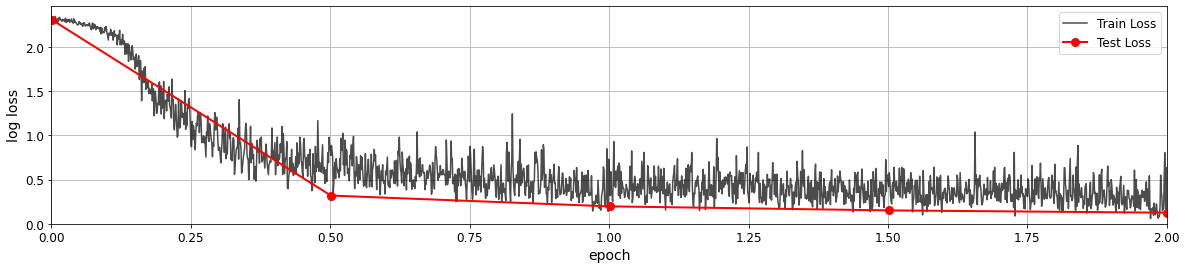

In [6]:
fig = plt.figure(figsize=(20, 4))

plt.plot(train_counter, train_losses, 'k-', alpha=.7)
plt.plot(test_counter, test_losses, 'r.-', linewidth=2, markersize=16)
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('epoch', fontsize=14); plt.ylabel('log loss', fontsize=14); plt.xlim(0, train_counter[-1]); plt.ylim(0);

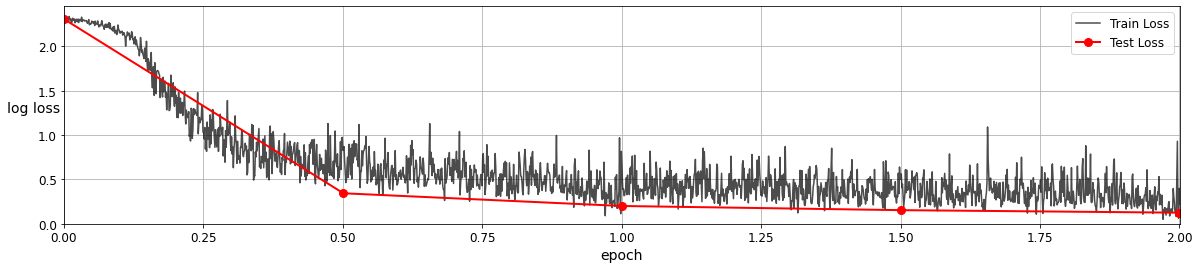

In [4]:
# Don't run this cell. 

In [25]:
for q, (X_train, y_train) in enumerate(train_loader):
    batch_data
    break


In [26]:
X_train.shape

torch.Size([60000, 1, 28, 28])